## Install Dependencies and Setup

In [101]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Exploring the Data

In [102]:
df = pd.read_csv('Google-Playstore.csv')

In [103]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [104]:
df.shape

(2312944, 24)

In [105]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [107]:
df.dtypes

App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object

In [108]:
df["App Name"] = df["App Name"].astype(str)
df["Category"] = df["Category"].astype(str)
df["Currency"] = df["Currency"].astype(str)
df["Minimum Android"] = df["Minimum Android"].astype(str)
df["Developer Id"] = df["Developer Id"].astype(str)
df["Released"] = df["Released"].astype(str)
df["Last Updated"] = df["Last Updated"].astype(str)
df["Content Rating"] = df["Content Rating"].astype(str)
df["Scraped Time"] = df["Scraped Time"].astype(str)

## Changing the True snd False values to 0 & 1 

In [109]:
df["Ad Supported"] = df["Ad Supported"].apply(lambda x: int(x == "true"))
df["In App Purchases"] = df["In App Purchases"].apply(lambda x: int(x == "true"))
df["Editors Choice"] = df["Editors Choice"].apply(lambda x: int(x == "true"))
df["Free"] = df["Free"].apply(lambda x: int(x == "true"))

In [110]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,0,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,0,0,0,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,0,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,0,0,0,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,0,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,0,0,0,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,0,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,0,0,0,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,0,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,0,0,0,2021-06-15 20:19:35


## Cleaning the Data

In [111]:
# removing the unwanted column
df=df.drop(["App Id","Privacy Policy","Developer Website","Developer Email"],axis=1)

In [112]:
df.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,0,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone,0,0,0,2021-06-15 20:19:35
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,0,0.0,USD,2.9M,5.0 and up,Webserveis,"May 21, 2020","May 06, 2021",Everyone,0,0,0,2021-06-15 20:19:35
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,0,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,0,0,0,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,0,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,0,0,0,2021-06-15 20:19:35
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,0,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone,0,0,0,2021-06-15 20:19:35


In [113]:
## removing XXX in currency with USD
df["Currency"] = df["Currency"].replace("XXX", "USD")

In [114]:
display(df)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,0,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone,0,0,0,2021-06-15 20:19:35
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,0,0.0,USD,2.9M,5.0 and up,Webserveis,"May 21, 2020","May 06, 2021",Everyone,0,0,0,2021-06-15 20:19:35
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,0,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,0,0,0,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,0,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,0,0,0,2021-06-15 20:19:35
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,0,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone,0,0,0,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,0,0.0,USD,77M,4.1 and up,ALICE GAME,nan,"Jun 01, 2021",Teen,0,0,0,2021-06-16 12:59:18
2312940,ORU Online,Education,0.0,0.0,100+,100.0,430,0,0.0,USD,44M,4.1 and up,"3Dream Studios, LLC","Jan 17, 2018","Feb 02, 2018",Everyone,0,0,0,2021-06-16 12:59:19
2312941,Data Structure,Education,0.0,0.0,100+,100.0,202,0,0.0,USD,29M,5.0 and up,appoworld,"Aug 19, 2018","Aug 19, 2018",Everyone,0,0,0,2021-06-16 12:59:19
2312942,Devi Suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,0,0.0,USD,10M,5.0 and up,Bhakti,"Aug 1, 2016","May 05, 2021",Everyone,0,0,0,2021-06-16 12:59:19


In [115]:
# exploring null values
df.isnull().sum()

App Name                0
Category                0
Rating              22883
Rating Count        22883
Installs              107
Minimum Installs      107
Maximum Installs        0
Free                    0
Price                   0
Currency                0
Size                  196
Minimum Android         0
Developer Id            0
Released                0
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
Scraped Time            0
dtype: int64

In [116]:
# operation on missing values
df['Released'] = pd.to_datetime(df['Released'])
df = df.dropna(subset=["App Name", "Developer Id"])
df['Size'] = df['Size'].fillna("5M")
df['Installs'] = df['Installs'].fillna("500+")
df['Minimum Android'] = df['Minimum Android'].fillna("4.1 and up")
df['Released'] = df['Released'].fillna(df['Released'].mean())
df['Currency'] = df['Currency'].fillna("USD")

In [117]:
df.head(100)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,0,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,2020-02-26,"Feb 26, 2020",Everyone,0,0,0,2021-06-15 20:19:35
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,0,0.0,USD,2.9M,5.0 and up,Webserveis,2020-05-21,"May 06, 2021",Everyone,0,0,0,2021-06-15 20:19:35
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,0,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,2019-08-09,"Aug 19, 2019",Everyone,0,0,0,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,0,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,2018-09-10,"Oct 13, 2018",Everyone,0,0,0,2021-06-15 20:19:35
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,0,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,2020-02-21,"Nov 12, 2018",Everyone,0,0,0,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Home Theater Remote Pro,Tools,2.6,171.0,"100,000+",100000.0,119403,0,0.0,USD,3.0M,4.0 and up,Igor Silakov,2016-06-04,"Jan 07, 2018",Everyone,0,0,0,2021-06-15 20:19:41
96,Духовно-нравственная культура (ДНК),Education,0.0,0.0,100+,100.0,103,0,0.0,USD,1.6M,1.6 and up,MOSCLUSTER LLC,2017-07-05,"Jul 05, 2017",Everyone,0,0,0,2021-06-15 20:19:41
97,Subtitle VR.,Education,0.0,0.0,100+,100.0,472,0,0.0,USD,2.1M,5.0 and up,Yu.Chirichenko,2017-07-06,"Jul 06, 2017",Everyone,0,0,0,2021-06-15 20:19:41
98,Interact 3,Education,2.6,21.0,"1,000+",1000.0,4961,0,0.0,USD,37M,2.3 and up,Compass Publishing,2017-09-08,"Sep 08, 2017",Everyone,0,0,0,2021-06-15 20:19:41


In [118]:
df.isnull().sum()

App Name                0
Category                0
Rating              22883
Rating Count        22883
Installs                0
Minimum Installs      107
Maximum Installs        0
Free                    0
Price                   0
Currency                0
Size                    0
Minimum Android         0
Developer Id            0
Released                0
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
Scraped Time            0
dtype: int64

## Exploratory Data Analysis

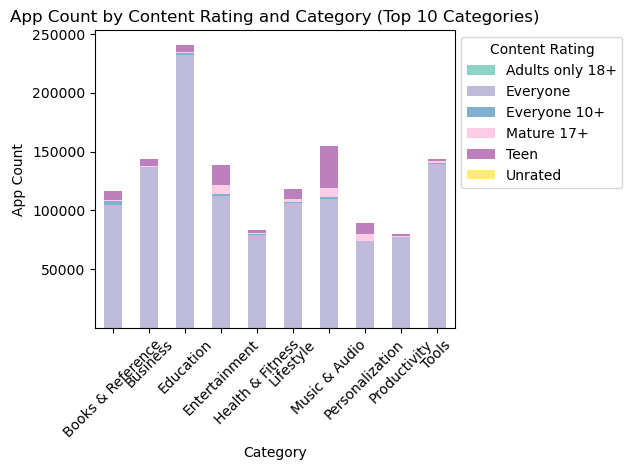

In [119]:
top_10_categories = df['Category'].value_counts().nlargest(10).index
df_top_10 = df[df['Category'].isin(top_10_categories)]
category_ratings = df_top_10.groupby(['Category', 'Content Rating']).size().unstack()
colors = plt.cm.Set3(np.linspace(0, 1, len(category_ratings.columns)))
category_ratings.plot(kind='bar', stacked=True, colormap='Set3')
plt.xlabel('Category')
plt.ylabel('App Count')
plt.title('App Count by Content Rating and Category (Top 10 Categories)')
plt.legend(title='Content Rating', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

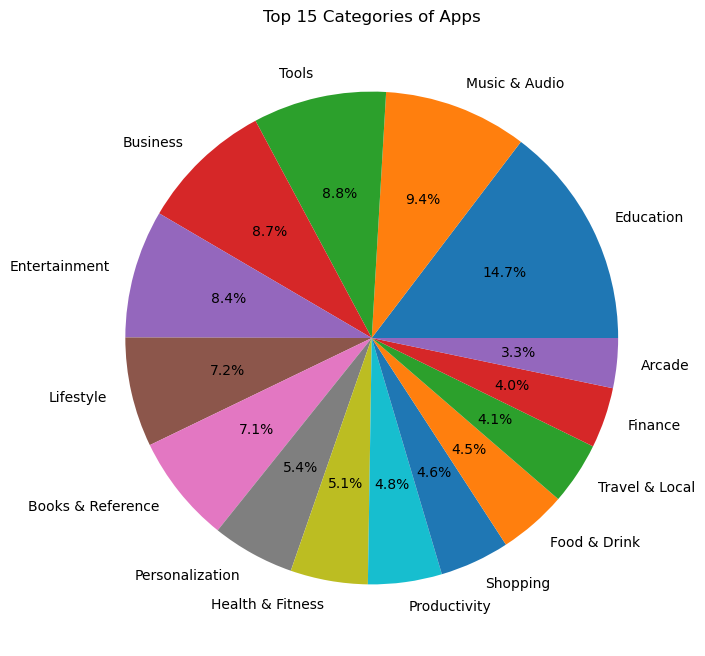

In [120]:
category_counts = df['Category'].value_counts().head(15)
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Top 15 Categories of Apps')
plt.show()

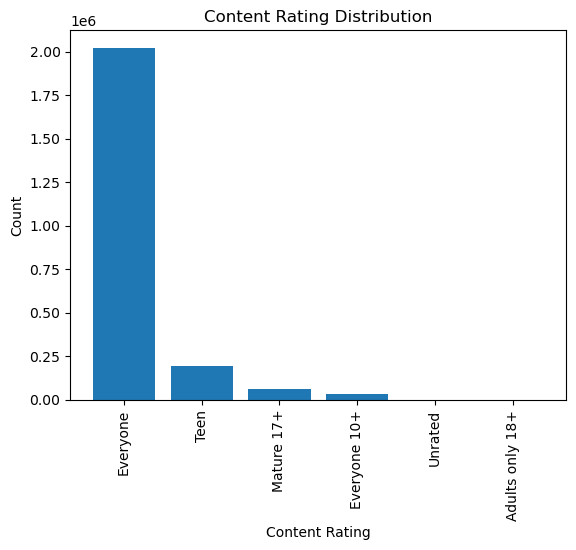

In [121]:
content_rating_counts = df['Content Rating'].value_counts()
plt.bar(content_rating_counts.index, content_rating_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Content Rating Distribution')
plt.show()

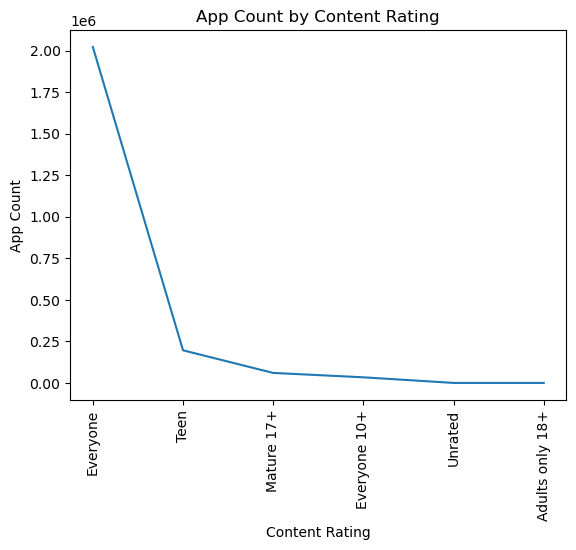

In [122]:
app_count_by_rating = df['Content Rating'].value_counts()
plt.plot(app_count_by_rating.index, app_count_by_rating.values)
plt.xlabel('Content Rating')
plt.ylabel('App Count')
plt.title('App Count by Content Rating')
plt.xticks(rotation=90)
plt.show()

## Train and build Classifier

In [123]:
X=df[['Maximum Installs', 'Free','Price', 'Ad Supported', 'In App Purchases', 'Editors Choice']]
Y=df['Installs']

In [124]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

## Multi Model Building

In [125]:
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier()
}

## Comparision of Accuracy, Precision, Recall and F1 of Models

In [126]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)
    
    # Making Predictions
    Y_train_pred=model.predict(X_train)
    Y_test_pred=model.predict(X_test)
    
    # Evaluating Models on Training Data
    accuracy_train = accuracy_score(Y_train, Y_train_pred)
    precision_train = precision_score(Y_train, Y_train_pred,average='weighted')
    recall_train = recall_score(Y_train, Y_train_pred,average='weighted')
    f1_train = f1_score(Y_train, Y_train_pred,average='weighted')

    # Evaluating Models on Tesing Data
    accuracy_test = accuracy_score(Y_test, Y_test_pred)
    precision_test = precision_score(Y_test, Y_test_pred,average='weighted')
    recall_test = recall_score(Y_test, Y_test_pred,average='weighted')
    f1_test = f1_score(Y_test, Y_test_pred,average='weighted')

    print(list(models.keys())[i])

    print("Training set performance:")
    print("Accuracy:", accuracy_train)
    print("Precision:", precision_train)
    print("Recall:", recall_train)
    print("F1:", f1_train)

    print("Test set performance:")
    print("Accuracy:", accuracy_test)
    print("Precision:", precision_test)
    print("Recall:", recall_test)
    print("F1:", f1_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sampl

Logistic Regression
Training set performance:
Accuracy: 5.94480518603187e-06
Precision: 3.551946209097265e-11
Recall: 5.94480518603187e-06
F1: 7.103849973585843e-11
Test set performance:
Accuracy: 6.485238516263897e-06
Precision: 4.226636617944284e-11
Recall: 6.485238516263897e-06
F1: 8.453218143571985e-11


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
Training set performance:
Accuracy: 0.999960007674203
Precision: 0.9999600361306266
Recall: 0.999960007674203
F1: 0.999960009903949
Test set performance:
Accuracy: 0.9999394711071815
Precision: 0.9999379994754437
Recall: 0.9999394711071815
F1: 0.9999385718748375


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Training set performance:
Accuracy: 0.999960007674203
Precision: 0.9999600361306266
Recall: 0.999960007674203
F1: 0.999960009903949
Test set performance:
Accuracy: 0.9999308241224932
Precision: 0.999929355424549
Recall: 0.9999308241224932
F1: 0.9999299247890573
